In [12]:
import numpy as np ;
import pandas as pd ;
import matplotlib.pyplot as plt 
from scipy import stats

In [13]:
data =  {
    'value': [10, 12, 12, 13, 12, 11, 10, 14, 13, 15, 10, 1015,750 ,12, 10, 12, 11, 13, 14, 15, 10, 10, 13, 12, 11]
}

df= pd.DataFrame(data)

<h2> 1) using IQR </h2>

In [14]:
def detect_outliers (df) :
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 *IQR 
    upper_bound = Q1 + 1.5 *IQR 
    outliers = df[ (df < lower_bound) | (df > upper_bound)]
    return outliers

outliers_iqr = detect_outliers(df) 
print("Outliers detected using Z-score:\n",outliers_iqr.dropna())

Outliers detected using Z-score:
      value
9     15.0
11  1015.0
12   750.0
19    15.0


<h2>2) using Z-score </h2>

In [15]:
def detect_outliers_using_zscore(df) :
    z_score = np.abs(stats.zscore(df))
    threshold = 3 
    outliers = df[(z_score > threshold).any(axis=1)]
    return outliers 
outliers_zscore = detect_outliers_using_zscore(df)
print("Outliers detected using Z-score:\n", outliers_zscore)

Outliers detected using Z-score:
     value
11   1015


<h2>3 .using BoxPlot </h2>

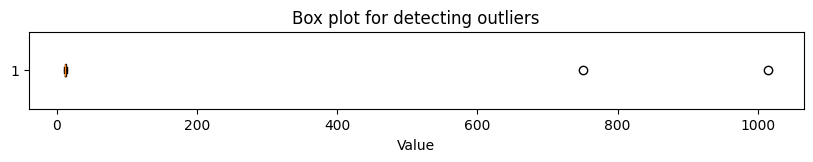

In [16]:
def plot_boxplot(df):
    plt.figure(figsize=(10, 1))
    plt.boxplot(df['value'], vert=False)
    plt.title('Box plot for detecting outliers')
    plt.xlabel('Value')
    plt.show()
plot_boxplot(df)